# EDA - Análisis exploratorio de datos

## Importación de librerías

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from scipy.stats import norm

warnings.filterwarnings('ignore')

## Importación de datos 

In [5]:
data = pd.read_csv("loan.csv")

Recordemos que debemos visualizar los datos que contiene el dataset, antes de hacer transformaciones en los mismos. La etapa de Curación es sumamente importante, pero puede hacerse de forma incorrecta, sino hacemos un correcto análisis explotario de los datos. 

## Análisis general del dataset

Visualizamos información general del dataset: cantidad de filas y columnas, cantidad de datos de nulos, tipos de de datos y su correspondencia con el tipo de variable (columnas numéricas deben ser Dtype int o float, y columnas categóricas deben ser tipos de datos str). Esta última validación será importante para el preparado de los features previo al entrenamiento de un modelo. 

In [9]:
data.shape

(61, 8)

In [10]:
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


Observamos si el dataset posee datos nulos

In [13]:
data.isna().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

Observamos cuales son las columnas de tipo numéricas y categóricas que se encuentran en el dataset. 

In [15]:
numerical_columns = data.select_dtypes(include='number').columns.to_list()
numerical_columns

['age', 'income', 'credit_score']

In [16]:
categorical_columns = data.select_dtypes(include='object').columns.to_list()
categorical_columns

['gender', 'occupation', 'education_level', 'marital_status', 'loan_status']

## Análisis del comportamiento de las variables 

**Variable a predecir = loan_status**

El préstamo va a ser otorgado cuando la variable asuma el valor de 'Approved' y va a ser rechazado cuando la variable asuma el valor de 'Denied'.

Podemos observar un cierto desbalanceo en las clases a predecir.

In [19]:
data['loan_status'].value_counts()

loan_status
Approved    45
Denied      16
Name: count, dtype: int64

### Numéricas

In [21]:
data[numerical_columns].describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


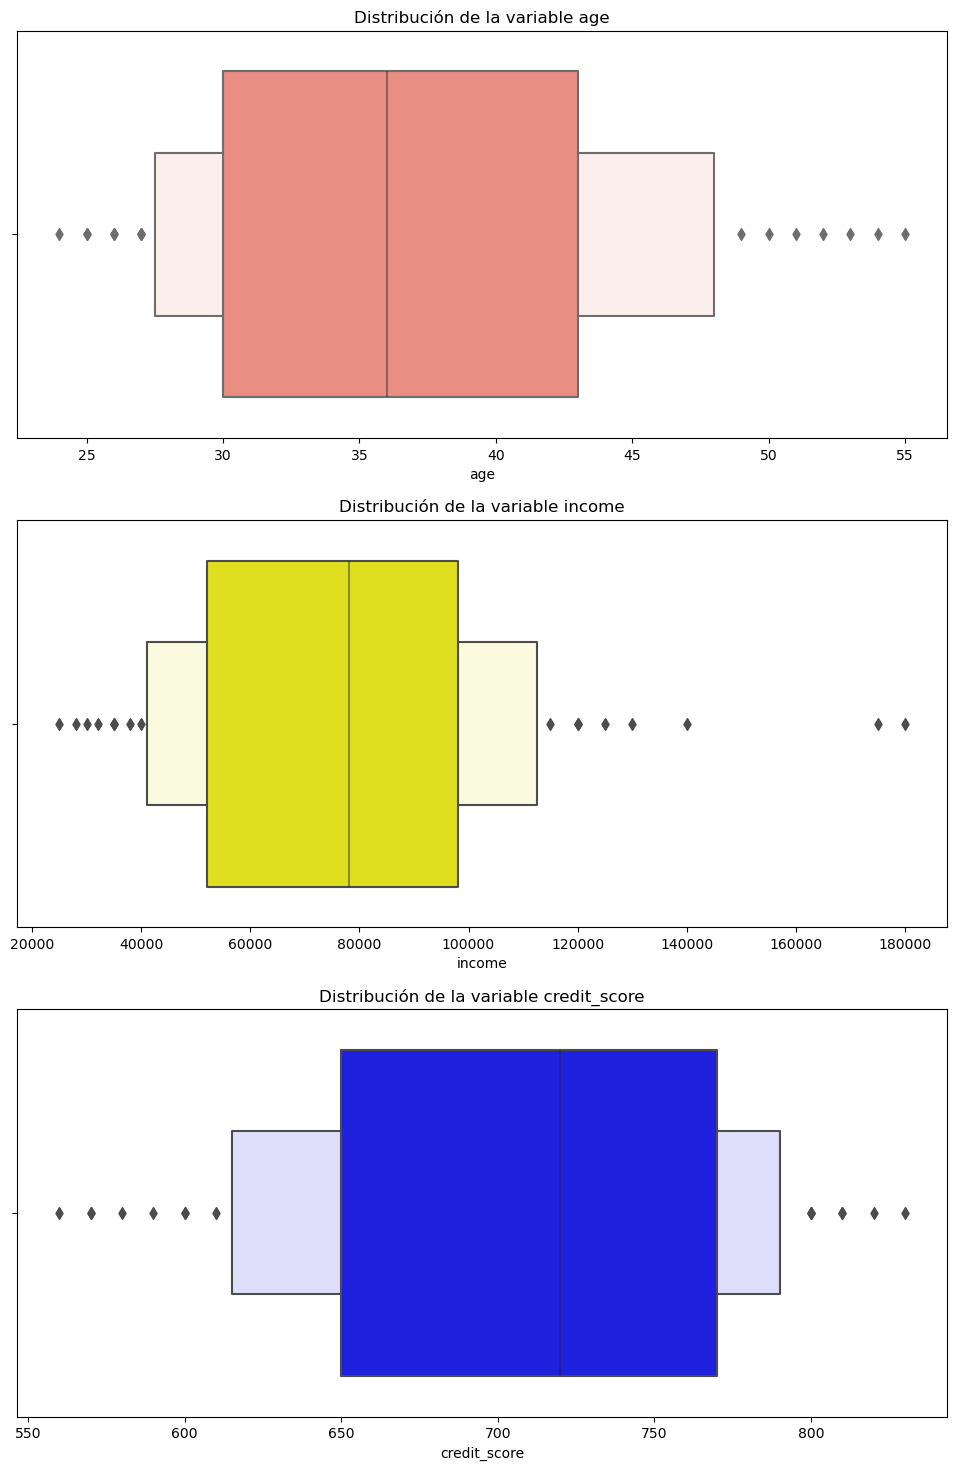

In [22]:
colors = ['salmon','yellow','blue']
fig, axes = plt.subplots(len(numerical_columns),1,figsize=(12,18))

for i, column in enumerate(numerical_columns):
    
    sns.boxenplot(data=data, x=column, color=colors[i],ax=axes[i])   
    axes[i].set_title(f'Distribución de la variable {column}')

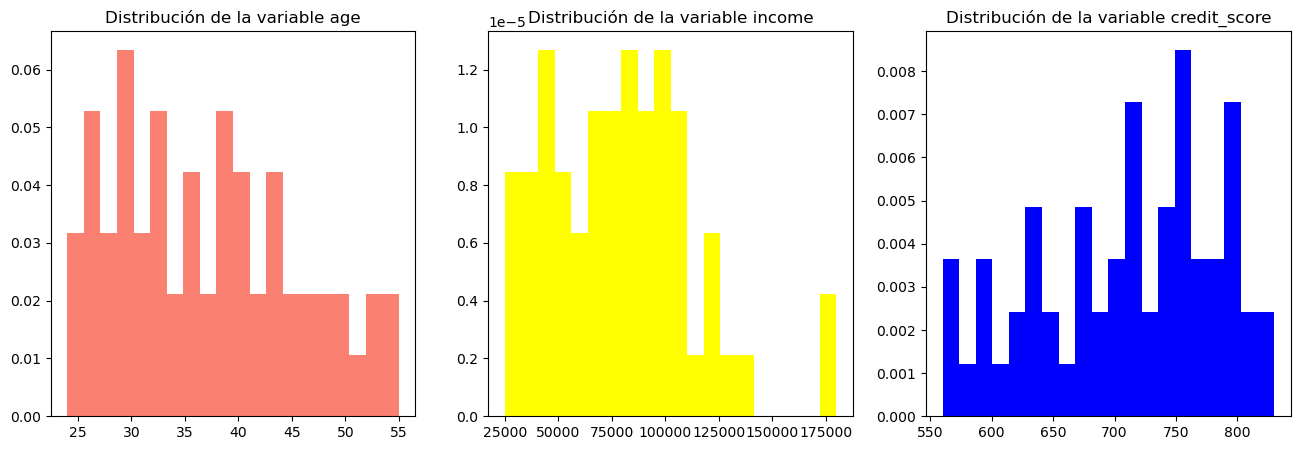

In [23]:
colors = ['salmon','yellow','blue']
fig, axes = plt.subplots(1, len(numerical_columns),figsize=(16,5))

for i, column in enumerate(numerical_columns):
   
    axes[i].hist(data[column], color=colors[i], bins=20, density=True)   
    axes[i].set_title(f'Distribución de la variable {column}')

Podemos observar la presencia de outliers, sobre todo en la variable Income.

¿Como cambia la distribución de las variables numéricas para las diferentes categorías de la variable objetivo?
¿Estas variables ayudan a dividir la población a predecir? ¿Contribuyen a explicar mejor su comportamiento?

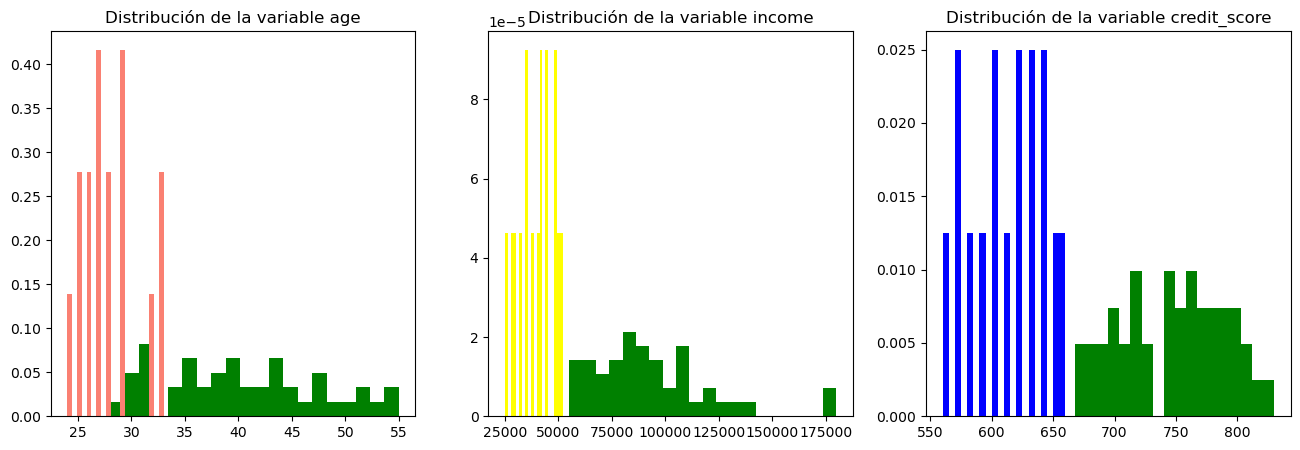

In [26]:
colors = ['salmon','yellow','blue']
fig, axes = plt.subplots(1, len(numerical_columns),figsize=(16,5))

for i, column in enumerate(numerical_columns):
   
    axes[i].hist(data[data['loan_status'] == 'Approved'][column], color='green', bins=20, density=True)  
    axes[i].hist(data[data['loan_status'] == 'Denied'][column], color=colors[i], bins=20, density=True)  
    axes[i].set_title(f'Distribución de la variable {column}')


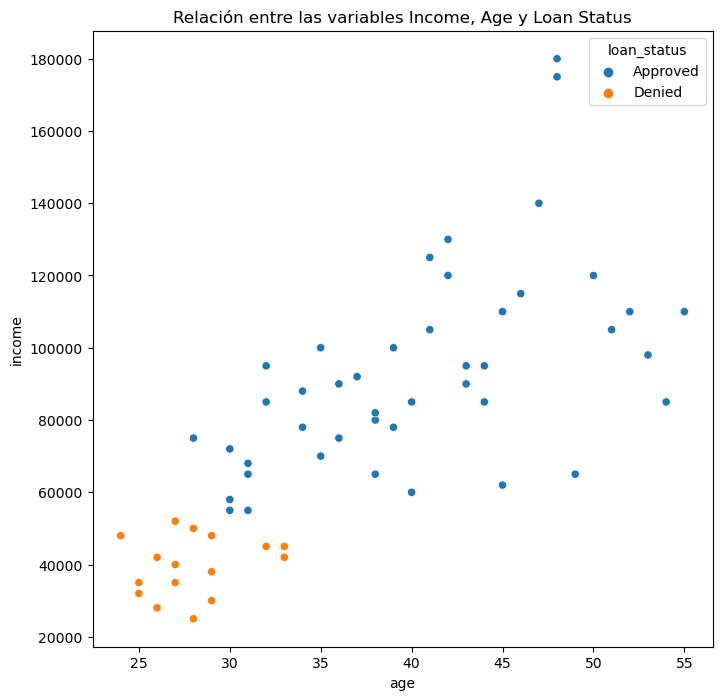

In [27]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x='age', y='income', hue='loan_status', legend="auto")  
plt.title(f'Relación entre las variables Income, Age y Loan Status')
plt.show()

### Categóricas

A las variables categóricas las podemos analizar en función a su frecuencia, también en conjunto con alguna variable numérica, o bien con la variable objetivo. 

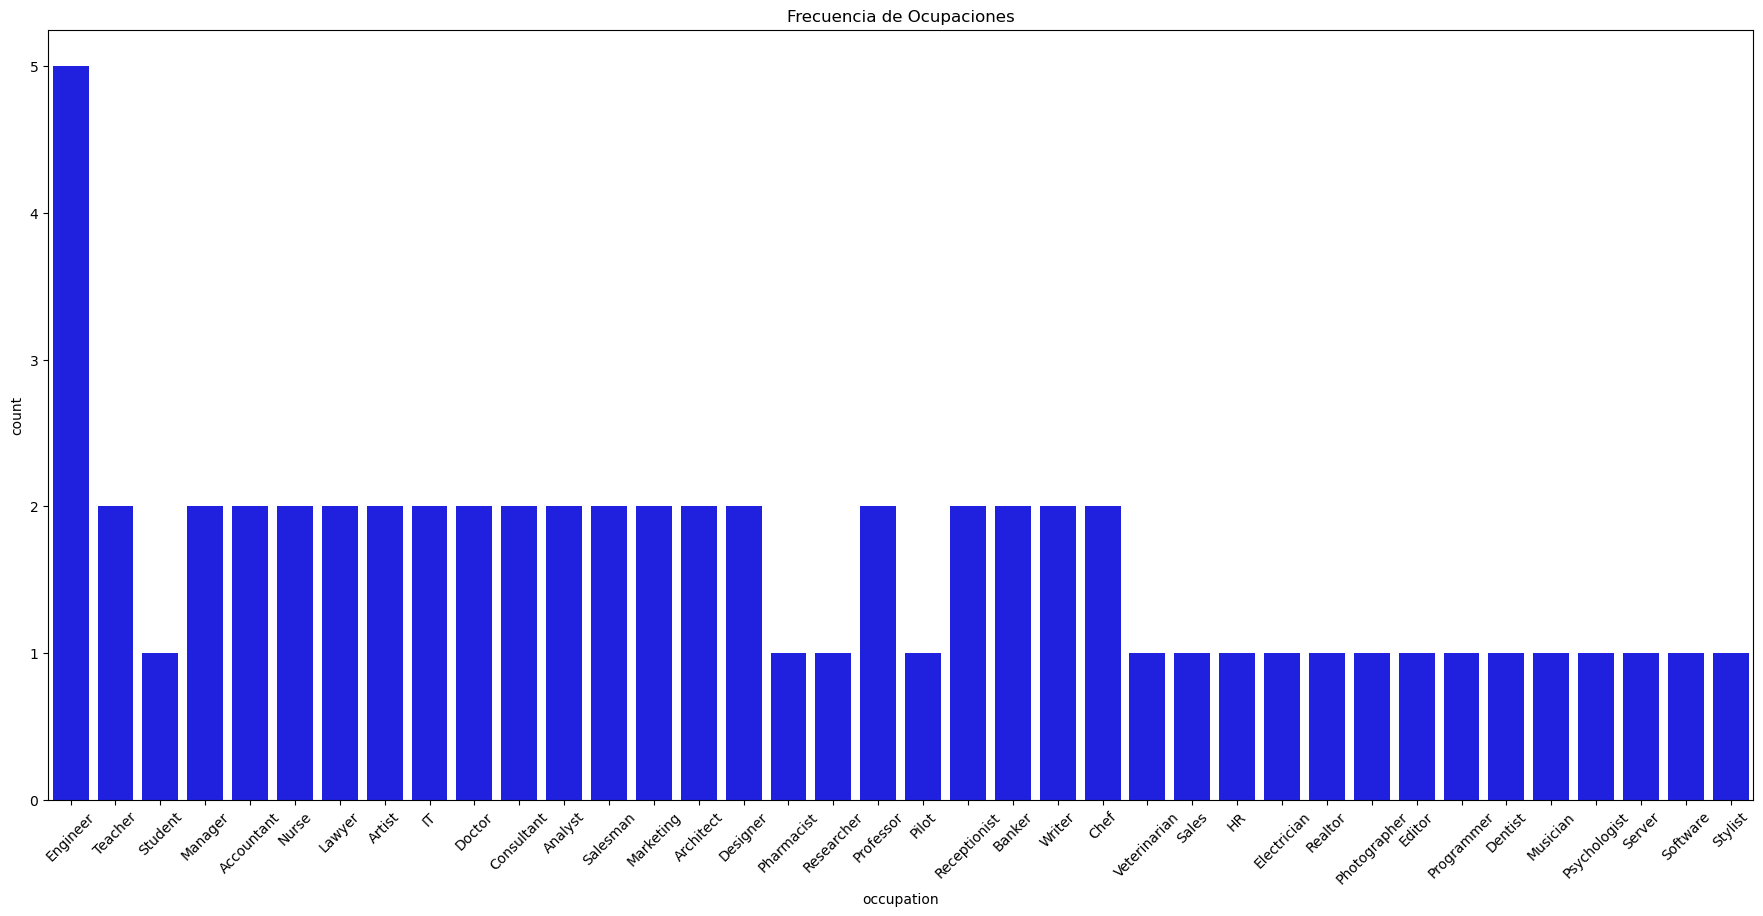

In [30]:
fig = plt.figure(figsize=(22,10))
sns.countplot(data=data, x='occupation',
                color='blue')
plt.xticks(rotation=45)
plt.title("Frecuencia de Ocupaciones")
plt.ticklabel_format(style='plain', axis='y')

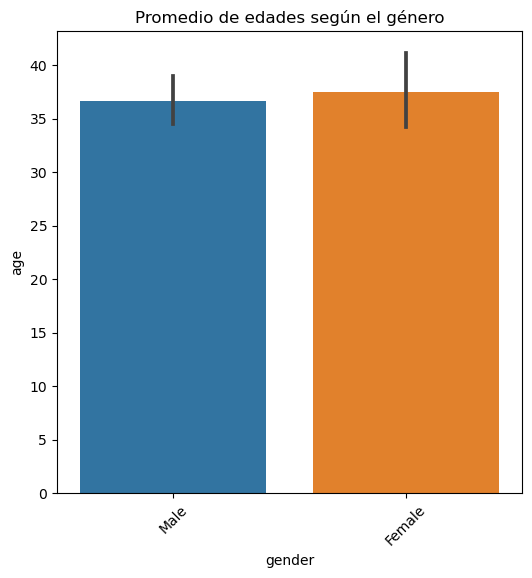

In [31]:
fig = plt.figure(figsize=(6,6))
sns.barplot(data=data,
                x='gender', y='age',
                estimator=np.mean)
plt.title("Promedio de edades según el género")
plt.xticks(rotation=45)
plt.show()

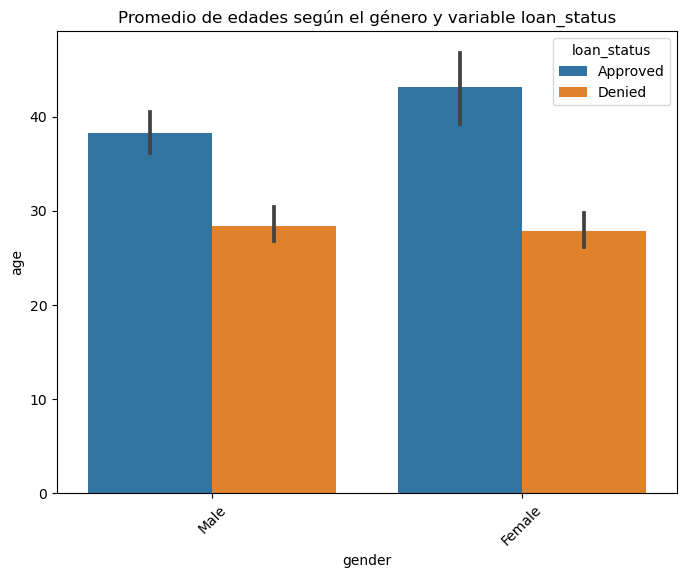

In [32]:
fig = plt.figure(figsize=(8,6))
sns.barplot(data=data,
                x='gender', y='age',
                hue='loan_status',
                estimator=np.mean)
plt.title("Promedio de edades según el género y variable loan_status")
plt.xticks(rotation=45)
plt.show()

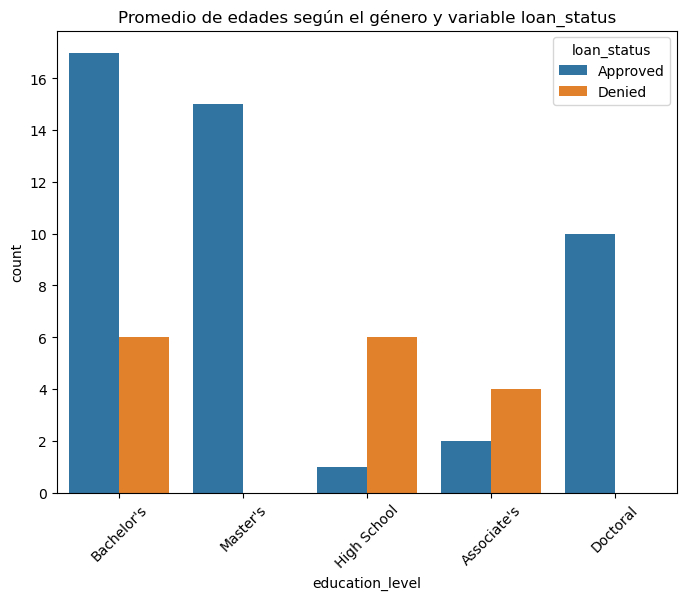

In [33]:
fig = plt.figure(figsize=(8,6))
sns.countplot(data=data, x='education_level',
                hue='loan_status')
plt.xticks(rotation=45)
plt.title("Promedio de edades según el género y variable loan_status")
plt.ticklabel_format(style='plain', axis='y')

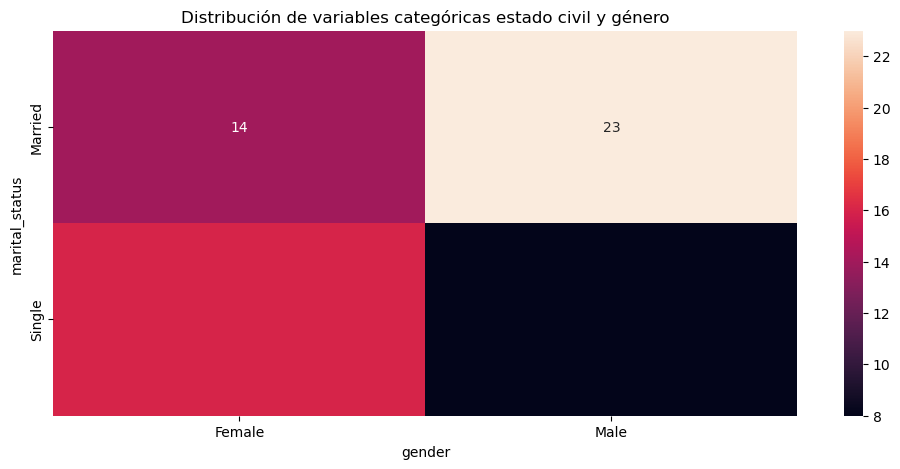

In [34]:
fig, ax = plt.subplots(figsize=(12,5))
exp = pd.crosstab(data.marital_status,
                  data.gender)
sns.heatmap(exp, annot=True, fmt='g')
plt.title("Distribución de variables categóricas estado civil y género")
plt.show()